In [1]:
import contextily
import geopandas
import matplotlib.pyplot as plt
import pandas
import shapely

In [2]:
west = -118.297
south = 34.087
east = -118.258
north = 34.125

cx = (slice(west, east), slice(south, north))

WEBMERCATOR = 3857

In [3]:
bounds = (
    geopandas.GeoDataFrame(
        geometry=[shapely.geometry.box(west, south, east, north)],
        crs="EPSG:4326",
    )
    .to_crs(epsg=WEBMERCATOR)
    .bounds
    .iloc[0]
)

In [4]:
img, extent = contextily.bounds2img(
    west,
    south,
    east,
    north,
    zoom=15,
    ll=True,
    source=contextily.providers.CartoDB.Voyager,
)

In [5]:
fig, ax = plt.subplots(figsize=(36,36))
ax.imshow(img, extent=extent)
ax.set_xlim(bounds.minx, bounds.maxx)
ax.set_ylim(bounds.miny, bounds.maxy)
ax.set_autoscale_on(False)
ax.axis("off");
plt.close(fig)

In [6]:
annotations = [
    (
        shapely.geometry.Point(-118.271778, 34.110675),
        "ROWENA\nRESERVOIR",
        { "fontsize": 12, "fontweight": "bold", "color": "royalblue" }
    ),
    (
        shapely.geometry.Point(-118.264331, 34.097310),
        "SILVER LAKE\nRESERVOIR",
        { "fontsize": 16, "fontweight": "bold", "color": "royalblue" }
    ),
    (
        shapely.geometry.Point(-118.265318, 34.102969),
        "IVANHOE\nRESERVOIR",
        { "fontsize": 12, "fontweight": "bold", "color": "royalblue" }
    ),
    (
        shapely.geometry.Point(-118.280880, 34.097067),
        "THOMAS STARR KING\nMIDDLE SCHOOL",
        { "fontsize": 12, "fontweight": "bold", "color": "gray" }
    ),
    (
        shapely.geometry.Point(-118.280825, 34.102664),
        "PROSPECT STUDIOS",
        { "fontsize": 12, "fontweight": "bold", "color": "gray" }
    ),
    (
        shapely.geometry.Point(-118.276845, 34.108587),
        "JOHN MARSHALL\nHIGH SCHOOL",
        { "fontsize": 12, "fontweight": "bold", "color": "gray" }
    ),
    (
        shapely.geometry.Point(-118.267045, 34.108644),
        "IVANHOE\nELEMENTARY\nSCHOOL",
        { "fontsize": 12, "fontweight": "bold", "color": "gray" }
    ),
    (
        shapely.geometry.Point(-118.284603, 34.105895),
        "FRANKLIN\nAVENUE\nELEMENTARY\nSCHOOL",
        { "fontsize": 12, "fontweight": "bold", "color": "gray" }
    ),
    (
        shapely.geometry.Point(-118.288084, 34.089348),
        "LOCKWOOD AVENUE\nELEMENTARY SCHOOL",
        { "fontsize": 12, "fontweight": "bold", "color": "gray" }
    ),
    (
        shapely.geometry.Point(-118.293377, 34.088692),
        "LOS ANGELES\nCITY COLLEGE",
        { "fontsize": 12, "fontweight": "bold", "color": "gray" }
    ),
    (
        shapely.geometry.Point(-118.275649, 34.088706),
        "MICHELTORENA\nELEMENTARY\nSCHOOL",
        { "fontsize": 12, "fontweight": "bold", "color": "gray" }
    ),
    (
        shapely.geometry.Point(-118.2821495,34.0955722),
        "MACK SENNETT\nSTUDIOS",
        { "fontsize": 8, "fontweight": "bold", "color": "gray" }
    ),
    (
        shapely.geometry.Point(-118.2902138, 34.0973519),
        "CHILDREN'S\nHOSPITAL",
        { "fontsize": 12, "fontweight": "bold", "color": "gray" }
    ),
    (
        shapely.geometry.Point(-118.2899632, 34.0962145),
        "HOLLYWOOD\nPRESBYTERIAN\nMEDICAL CENTER",
        { "fontsize": 12, "fontweight": "bold", "color": "gray" }
    ),
    (
        shapely.geometry.Point(-118.279806, 34.121445),
        "GRIFFITH PARK",
        { "fontsize": 24, "fontweight": "bold", "color": "darkgreen" }
    ),
    (
        shapely.geometry.Point(-118.294190, 34.100207),
        "BARNSDALL\nART PARK",
        { "fontsize": 12, "fontweight": "bold", "color": "darkgreen" }
    ),
]
annotation_gdf = (
    geopandas.GeoDataFrame.from_records(
        annotations,
        columns=["geometry", "label", "args"],
    )
    .set_crs(epsg=4326)
    .to_crs(epsg=WEBMERCATOR)
)

for i, row in annotation_gdf.iterrows():
    ax.annotate(
        row.label,
        xy=row.geometry.coords[:][0],
        ha="center",
        va="center",
        **row.args
    )

In [7]:
centerline = (
    geopandas.read_file("data/centerline.geojson")
    .to_crs(epsg=2229)
    .assign(buffered = lambda x: x.buffer(5280./2.))
    .set_geometry("buffered")
    .to_crs(epsg=WEBMERCATOR)
)
    
centerline.plot(
    alpha=1.0,
    lw=8,
    facecolor='none',
    edgecolor='dimgray',
    linewidth=4,
    linestyle=(0, (5, 5)),
    ax=ax,
)

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

In [8]:
hin = (
    geopandas.read_file("data/hin_subset.geojson")
    .cx[cx]
    .to_crs(epsg=2229)
    .assign(buffered = lambda x: x.buffer(100.))
    .set_geometry("buffered")
    .to_crs(epsg=WEBMERCATOR)
)

hin.dissolve().plot(
    ax=ax,
    lw=1,
    facecolor='none',
    edgecolor='red',
    linewidth=2,
    linestyle="dashed",
)

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

In [9]:
zoning = (
    geopandas.read_file("data/zoning_study_area.geojson")
    .cx[cx]
    .to_crs(epsg=WEBMERCATOR)
)
zoning[zoning.ZONE_SMRY == "COMMERCIAL"].plot(
    ax=ax,
    color="red",
    alpha=0.1,
)
zoning[zoning.ZONE_SMRY == "INDUSTRIAL"].plot(
    ax=ax,
    color="teal",
    alpha=0.2,
)
zoning[zoning.ZONE_SMRY == "PUBLIC FACILITY"].plot(
    ax=ax,
    color="midnightblue",
    alpha=0.2,
)

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

In [10]:
metro_b_line = (
    geopandas.read_file("data/802_Red_Purple_Track_0316.zip")
    .to_crs(epsg=4326)
    .cx[cx]
    .to_crs(epsg=WEBMERCATOR)
)
metro_b_line.plot(
    ax=ax,
    color="red",
    lw=4,
    label="Metro B (Red) Line"
)

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

In [11]:
metro_b_stations = (
    geopandas.read_file("data/802_805_RedPurple_Stations_0316.zip")
    .cx[cx]
    .to_crs(epsg=WEBMERCATOR)
)
metro_b_stations.plot(
    ax=ax,
    color="red",
    markersize=500,
    alpha=1.0,
)

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

In [12]:
metrolink = (
    geopandas.read_file("data/Metrolink_Stations.geojson")
    .cx[cx]
    .to_crs(epsg=WEBMERCATOR)
)
metrolink.plot(
    ax=ax,
    markersize=500,
    color="#03838f",
)

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

In [13]:
dash_lines = (
    geopandas.read_file("data/Community_DASH_Routes.geojson")
    .cx[cx]
    .to_crs(epsg=WEBMERCATOR)
)
dash_lines = dash_lines[dash_lines.RouteName != "Los Feliz"]  # discontinued in favor of observatory


dash_stops = (
    geopandas.read_file("data/Community_DASH_Stops.geojson")
    .cx[cx]
    .to_crs(epsg=WEBMERCATOR)
)
dash_stops = dash_stops[dash_stops.RouteName != "Los Feliz"]  # discontinued in favor of observatory

dash_lines.plot(
    ax=ax,
    color="dodgerblue",
    lw=3,
    alpha=1.0,
)
dash_stops.plot(
    ax=ax,
    color="dodgerblue",
    alpha=1.0,
    markersize=100,
)

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

In [14]:
metro_bus_lines = (
    pandas.concat([
        geopandas.read_file("data/LocalCBD1221.zip"),
        geopandas.read_file("data/LocalNonCBD1221.zip"),
        geopandas.read_file("data/RapidBRT1221.zip"),
    ])
    .cx[cx].
    to_crs(epsg=WEBMERCATOR)
)
metro_bus_lines.plot(
    ax=ax,
    color="darkorange",
    lw=3,
    alpha=1.0,
)
metro_bus_stops = (
    geopandas.read_file("data/LineServingStops1221.zip")
    .cx[cx]
    .to_crs(epsg=WEBMERCATOR)
)
metro_bus_stops.plot(ax=ax, color="darkorange", alpha=1.0, markersize=100)

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

In [15]:
bikeshare = (
    geopandas.read_file("data/bikeshare.geojson")
    .cx[cx]
    .to_crs(epsg=WEBMERCATOR)
)
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
# https://stackoverflow.com/questions/2318288/how-to-use-custom-png-image-marker-with-plot
bikeshare_icon = plt.imread("icons/bikeshare.png")
for i, station in bikeshare.iterrows():
    im = OffsetImage(bikeshare_icon, zoom=10/ax.figure.dpi)
    im.image.axes = ax
    ab = AnnotationBbox(
        im,
        (station.geometry.x,station.geometry.y),
        frameon=False,
        pad=0.0,
    )

    ax.add_artist(ab)

In [16]:
bikeways = (
    geopandas.read_file("data/Bikeways_(Existing).geojson")
    .cx[cx]
    .to_crs(epsg=WEBMERCATOR)
)

(
    bikeways
    [bikeways.Bikeway_Type.isin(["Lane", "Buffer Bike Lane"])]
    .plot(
        ax=ax,
        color="green",
        lw=4,
    )
)
(
    bikeways
    [bikeways.Bikeway_Type.isin(["Path"])]
    .plot(
        ax=ax,
        color="darkgreen",
        lw=6,
    )
)
# Removed per request
#(
#    bikeways
#    [bikeways.Bikeway_Type.isin(["Sharrowed Route", "Route"])]
#    .plot(
#        ax=ax,
#        color="green",
#        lw=2,
#        ls="dotted",
#    )
#)

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

In [17]:
# To be added manually by Siobhan
"""
ax.arrow(
    0.05,
    0.85,
    0.0,
    0.07,
    width=0.01,
    color="black",
    transform=ax.transAxes
)
  
ax.annotate(
    "North",
    xy=(0.05, 0.98),
    ha='center',
    va='center',
    fontsize=36,
    xycoords=ax.transAxes
)
"""

'\nax.arrow(\n    0.05,\n    0.85,\n    0.0,\n    0.07,\n    width=0.01,\n    color="black",\n    transform=ax.transAxes\n)\n  \nax.annotate(\n    "North",\n    xy=(0.05, 0.98),\n    ha=\'center\',\n    va=\'center\',\n    fontsize=36,\n    xycoords=ax.transAxes\n)\n'

In [18]:
# Gross! Create a line of known length for a scale
# To be added manually by Siobhan
"""
a = (
    geopandas.GeoSeries(
        shapely.geometry.Point(-118.2678246,34.0881627,), crs="EPSG:4326"
    )
    .to_crs(epsg=2229)
)
b = a.translate(xoff=5280./2.)
bar = geopandas.GeoSeries(
    shapely.geometry.LineString((a.iloc[0], b.iloc[0])),
    crs="EPSG:2229",
).to_crs(epsg=WEBMERCATOR)
bar.plot(ax=ax,lw=20, color="black", capstyle="round")
ax.annotate(
    "1/2 Mile",
    xy=(0.86, 0.015),
    ha='center',
    va='center',
    fontsize=24,
    xycoords=ax.transAxes
)
"""

'\na = (\n    geopandas.GeoSeries(\n        shapely.geometry.Point(-118.2678246,34.0881627,), crs="EPSG:4326"\n    )\n    .to_crs(epsg=2229)\n)\nb = a.translate(xoff=5280./2.)\nbar = geopandas.GeoSeries(\n    shapely.geometry.LineString((a.iloc[0], b.iloc[0])),\n    crs="EPSG:2229",\n).to_crs(epsg=WEBMERCATOR)\nbar.plot(ax=ax,lw=20, color="black", capstyle="round")\nax.annotate(\n    "1/2 Mile",\n    xy=(0.86, 0.015),\n    ha=\'center\',\n    va=\'center\',\n    fontsize=24,\n    xycoords=ax.transAxes\n)\n'

In [19]:
from matplotlib.transforms import TransformedBbox
from matplotlib.image import BboxImage
from matplotlib.legend_handler import HandlerBase
from matplotlib.image import Bbox

class ImageHandler(HandlerBase):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize,
                       trans):


        # create a bounding box to house the image
        bb = Bbox.from_bounds(
            xdescent+10,
            ydescent-6,
            36,
            36,
        )

        tbb = TransformedBbox(bb, trans)
        image = BboxImage(tbb)
        image.set_data(bikeshare_icon)

        self.update_prop(image, orig_handle, legend)

        return [image]

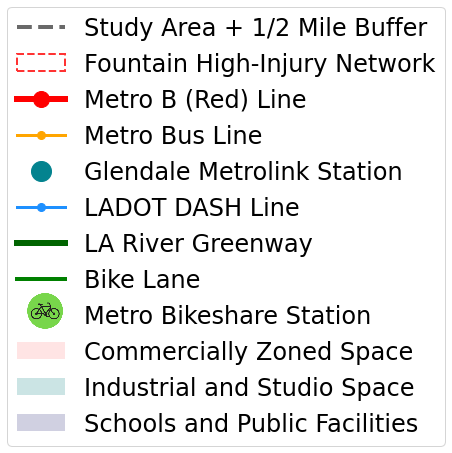

In [20]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch, Circle

placeholder = object()
legend_elements = [
    Line2D([0], [0], color='dimgray', lw=4, linestyle="dashed"),
    Patch(facecolor='none', edgecolor="red", linestyle="dashed", lw=2, alpha=0.8, capstyle="round"),
    Line2D([0], [0], color='red', lw=6, marker="o", markersize=16),
    Line2D([0], [0], color='orange', lw=3, marker="o", markersize=8,),
    Line2D([0],[0], color="white", marker="o", markersize=20, markeredgecolor="#03838f", markerfacecolor="#03838f"),
    Line2D([0], [0], color='dodgerblue', lw=3, marker="o", markersize=8,),
    Line2D([0], [0], color='darkgreen', lw=6,),
    Line2D([0], [0], color='green', lw=4,),
#    Line2D([0], [0], color='green', ls="dotted", lw=2),
    OffsetImage(bikeshare_icon),
    Patch(facecolor='red', alpha=0.1),
    Patch(facecolor='teal', alpha=0.2),
    Patch(facecolor='midnightblue', alpha=0.2),
]
text = [
    "Study Area + 1/2 Mile Buffer",
    "Fountain High-Injury Network",
    "Metro B (Red) Line",
    "Metro Bus Line",
    "Glendale Metrolink Station",
    "LADOT DASH Line",
    "LA River Greenway",
    "Bike Lane",
#    "Sharrowed Bike Route",
    "Metro Bikeshare Station",
    "Commercially Zoned Space",
    "Industrial and Studio Space",
    "Schools and Public Facilities",
]

legend_fig, legend_ax = plt.subplots()
plt.close(legend_fig)
legend_ax.axis("off")
# Create the figure
legend_ax.legend(
    handles=legend_elements,
    labels=text,
    fontsize=24,
    loc="center",
    handler_map={OffsetImage: ImageHandler()},
)

legend_fig.savefig("legend.png", dpi=100, bbox_inches="tight")
legend_fig.savefig("legend.pdf", dpi=100, bbox_inches="tight")
legend_fig

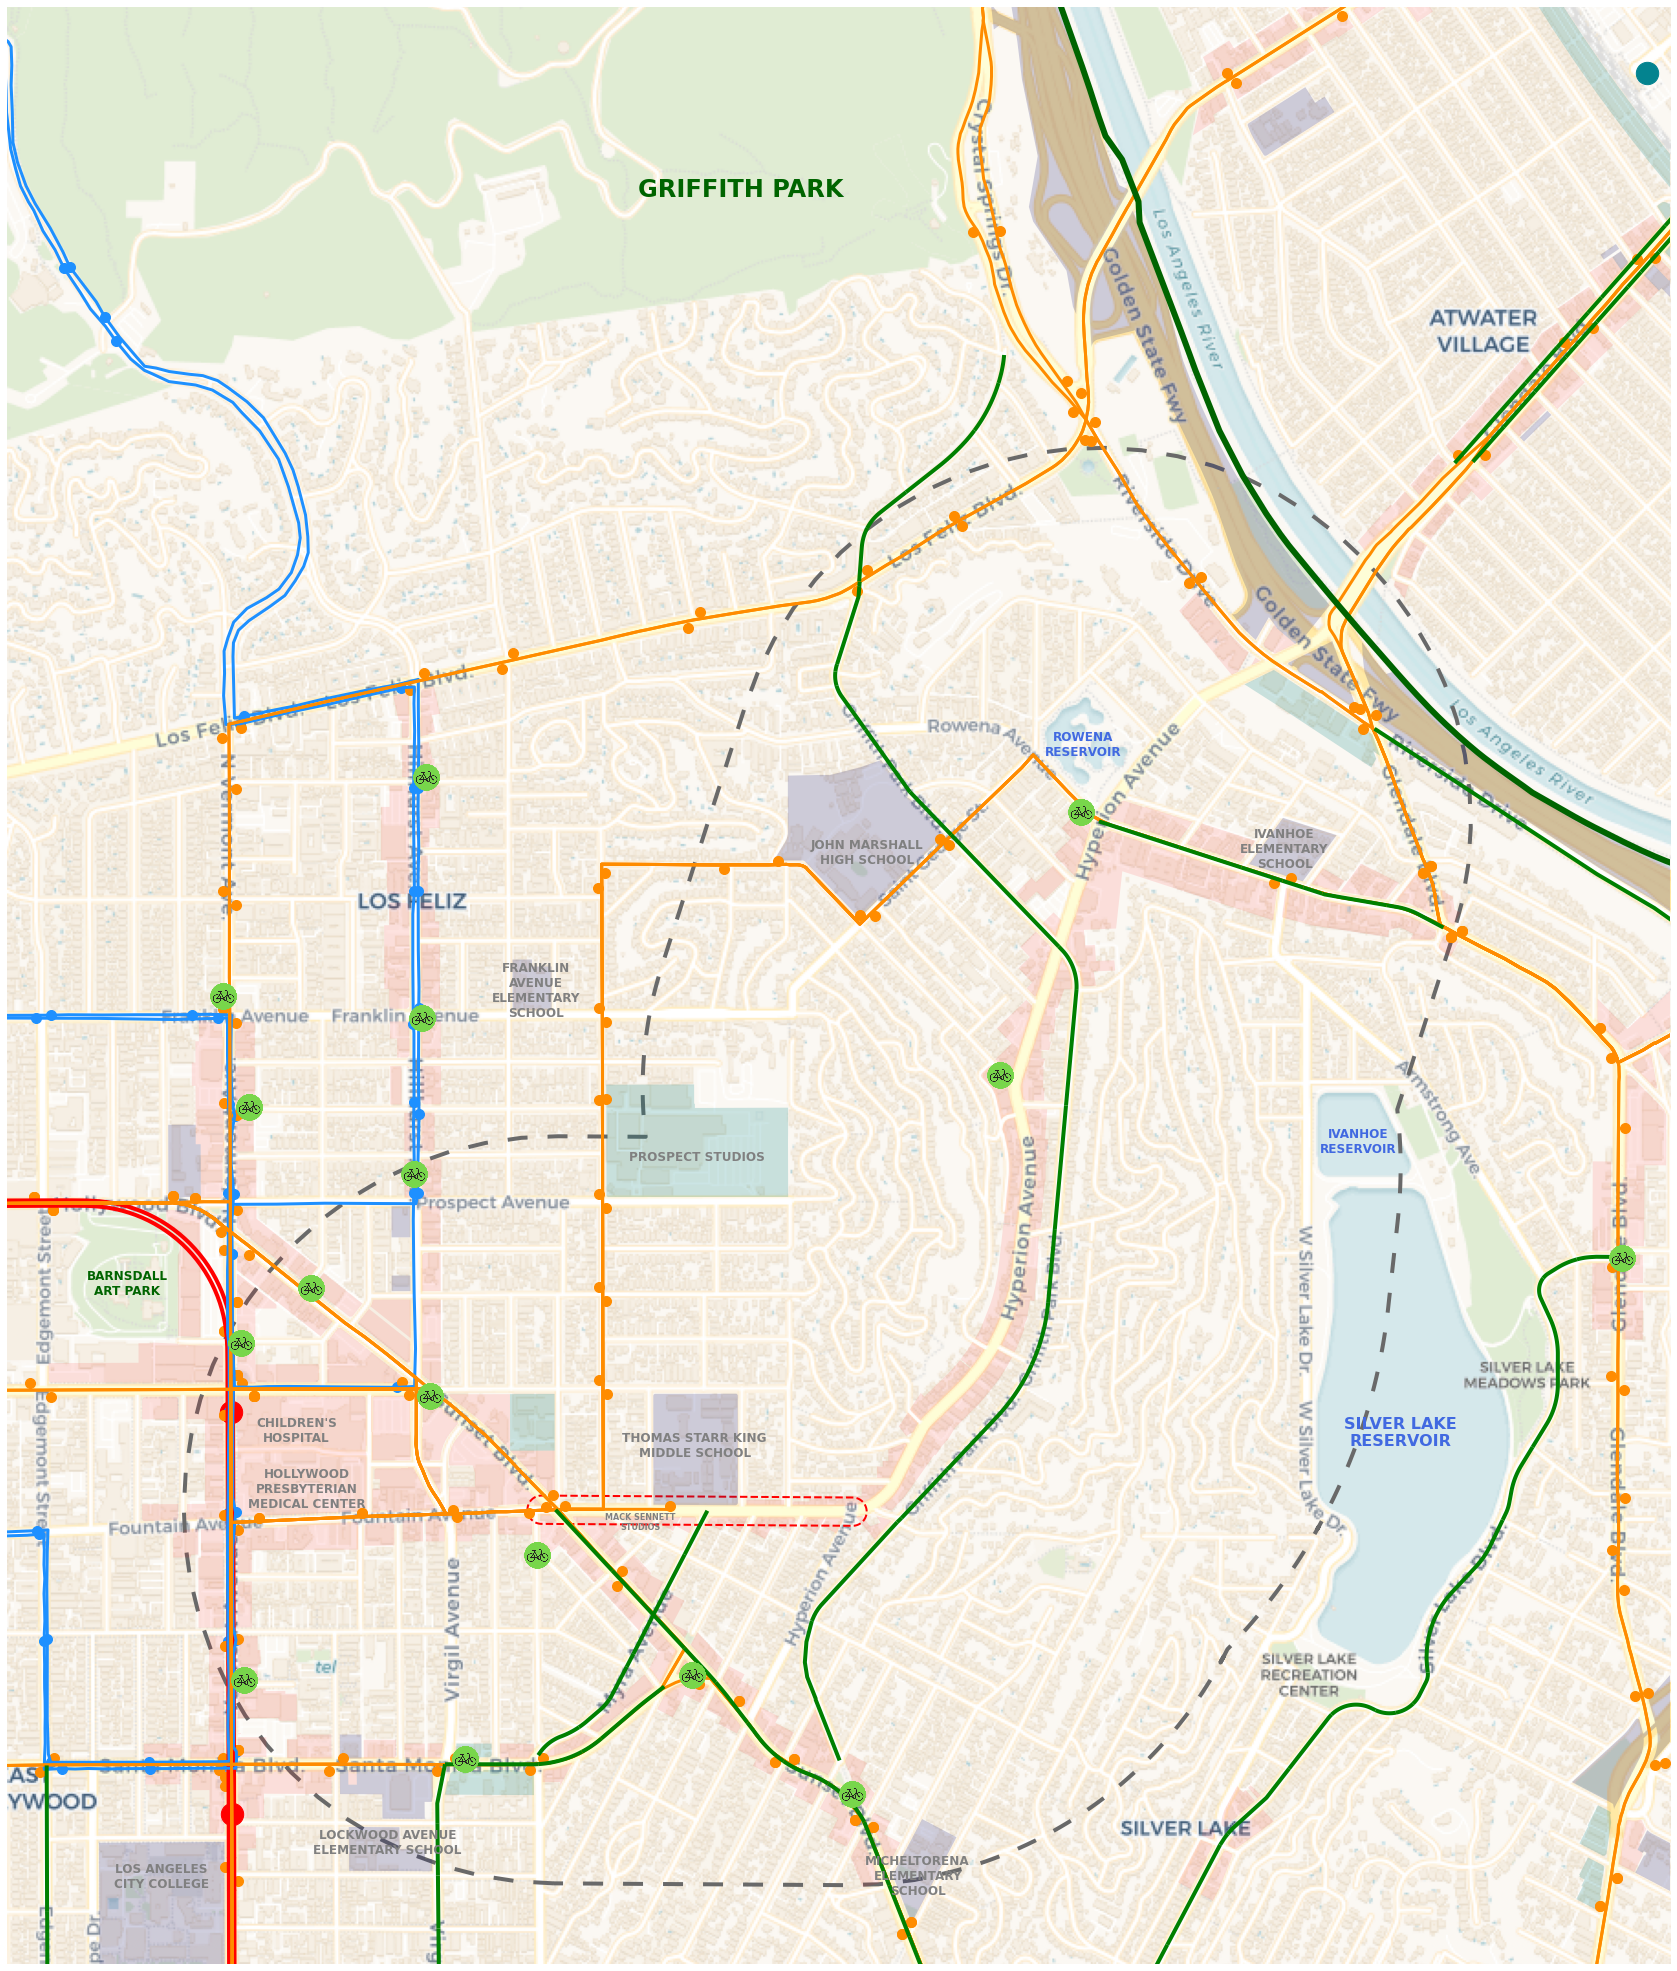

In [21]:
fig

In [22]:
fig.savefig("hyperion.png", dpi=100, bbox_inches="tight")
fig.savefig("hyperion.pdf", dpi=100, bbox_inches="tight")